# Data and Library Imports


In [1]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 29.8 MB/s eta 0:00:00


In [2]:
from IPython import get_ipython
from IPython.display import display

In [3]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
import folium
import folium.plugins
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import plot_model

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd drive/MyDrive/ENGO_645/ENGO_645_Project_W2025/

/content/drive/MyDrive/ENGO_645/ENGO_645_Project_W2025


In [7]:
tif_files = [
    'Data/Soil_Geochem/Soil_IDW_Ag/Soil_IDW_Ag.tif',  #Silver
    'Data/Soil_Geochem/Soil_IDW_As/Soil_IDW_As.tif',  #Arsenic
    'Data/Soil_Geochem/Soil_IDW_Al/Soil_IDW_Al.tif',  #Aluminum
    'Data/Soil_Geochem/Soil_IDW_Co/Soil_IDW_Co.tif',  #Cobalt
    'Data/Soil_Geochem/Soil_IDW_Bi/Soil_IDW_Bi.tif',  #Bismuth
    'Data/Soil_Geochem/Soil_IDW_Cu/Soil_IDW_Cu.tif',  #Copper
    'Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif',  #Gold
    'Data/Soil_Geochem/Soil_IDW_Zn/Soil_IDW_Zn.tif',  #Zinc
    'Data/Soil_Geochem/Soil_IDW_Pb/Soil_IDW_Pb.tif',  #Lead
    'Data/Soil_Geochem/Soil_IDW_Ni/Soil_IDW_Ni.tif',  #Nickel
    'Data/Soil_Geochem/Soil_IDW_Mo/Soil_IDW_Mo.tif',  #Molybdenum
    'Data/Soil_Geochem/Soil_IDW_W/Soil_IDW_W.tif',    #Tungsten
    'Data/Soil_Geochem/Soil_IDW_Hg/Soil_IDW_Hg.tif',  #Mercury
    'Data/Soil_Geochem/Soil_IDW_Sn/Soil_IDW_Sn.tif',  #Tin
    'Data/Soil_Geochem/Soil_IDW_Sb/Soil_IDW_Sb.tif',  #Antimony
    'Data/Soil_Geochem/Soil_IDW_Te/Soil_IDW_Te.tif'   #Tellurium
]

#stack rasters
rasters = []
for tif in tif_files:
    with rasterio.open(tif) as src:
        array = src.read(1)  #first band
        array = (array - np.min(array)) / (np.max(array) - np.min(array))  #Normalize 0-1
        rasters.append(array)

#Convert list to NumPy array
cnn_input = np.stack(rasters, axis=-1)

print("CNN Input Shape:", cnn_input.shape) #height width of raster and number of minerals

CNN Input Shape: (703, 598, 16)


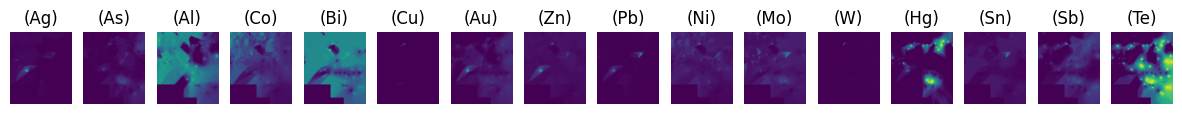

In [8]:
fig, axes = plt.subplots(1, len(tif_files), figsize=(15, 5))
titles = ["(Ag)", "(As)", "(Al)", "(Co)", "(Bi)", "(Cu)", "(Au)", "(Zn)", "(Pb)", "(Ni)", "(Mo)", "(W)", "(Hg)", "(Sn)", "(Sb)", "(Te)"]

for i, ax in enumerate(axes):
    ax.imshow(cnn_input[:, :, i], cmap='viridis')
    ax.set_title(titles[i])
    ax.axis("off")

plt.show()

In [9]:
#setting label or target of model
gold_index = tif_files.index('Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif')
gold_raster = rasters[gold_index]

# Model Building and Testing Using Soil Geochem

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding='same', input_shape=(cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])),
    Conv2D(64, (3, 3), activation="relu", padding='same'),
    Conv2D(1, (3, 3), activation="sigmoid", padding='same')
])

#compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#set label as gold raster
labels = gold_raster.reshape(cnn_input.shape[0], cnn_input.shape[1], 1)

#reshape data for model input
cnn_input = cnn_input.reshape(1, cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])
labels = labels.reshape(1, labels.shape[0], labels.shape[1], labels.shape[2])

#Train Model
model.fit(cnn_input, labels, epochs=10, batch_size=4)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.1660 - loss: 0.6960
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.2998 - loss: 0.6300
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3004 - loss: 0.5681
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.5108
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.4569
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3004 - loss: 0.4073
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.3004 - loss: 0.3640
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.3290
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.3046
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.2915


In [11]:
predictions = model.predict(cnn_input)

predictions = predictions.reshape(gold_raster.shape)

predictions = (predictions - np.min(predictions)) / (np.max(predictions) - np.min(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step


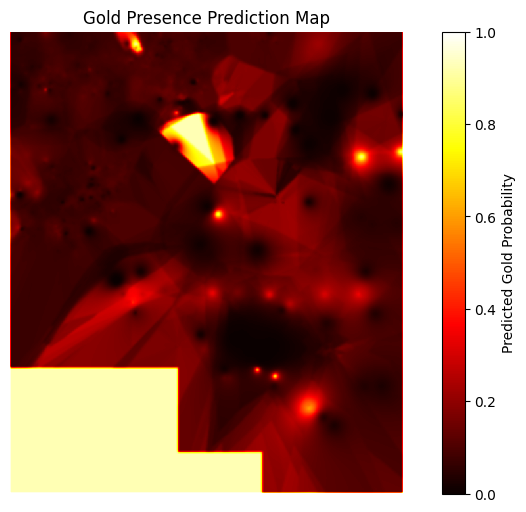

In [12]:
plt.figure(figsize=(10, 6))
plt.imshow(predictions, cmap="hot", interpolation="nearest")
plt.colorbar(label="Predicted Gold Probability")
plt.title("Gold Presence Prediction Map")
plt.axis("off")
plt.show()

In [13]:
threshold = 0.5
predicted_classes = (predictions > threshold).astype(int)

# Convert true_classes to binary using the same threshold
true_classes = (gold_raster > threshold).astype(int) #changed to convert to binary
true_classes = true_classes.flatten()
predicted_classes = predicted_classes.flatten()

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(cm)

# Accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.2f}")

# Precision
precision = precision_score(true_classes, predicted_classes)
print(f"Precision: {precision:.2f}")

# Recall
recall = recall_score(true_classes, predicted_classes)
print(f"Recall: {recall:.2f}")

# F1-Score
f1 = f1_score(true_classes, predicted_classes)
print(f"F1-Score: {f1:.2f}")

Confusion Matrix:
[[357471  62732]
 [   191      0]]
Accuracy: 0.85
Precision: 0.00
Recall: 0.00
F1-Score: 0.00


# Model Building and Testing Using Soil and Geophysical Anomaly

In [14]:
geo_chem_tif = "Data/Soil_Geochem/Soil_IDW_Ag/Soil_IDW_Ag.tif"
geo_phys_tif = "Data/Geophysical_Anomaly/GeoPhysAnomaly_DONE.tif"

with rasterio.open(geo_chem_tif) as src1, rasterio.open(geo_phys_tif) as src2:
    print(f"Geochemical Shape: {src1.shape}, CRS: {src1.crs}")
    print(f"Geophysical Shape: {src2.shape}, CRS: {src2.crs}")

Geochemical Shape: (703, 598), CRS: EPSG:4326
Geophysical Shape: (351, 299), CRS: EPSG:4326


In [15]:
def resample_raster(source_tif, reference_tif, output_tif):
    """Resample `source_tif` to match `reference_tif` resolution and shape."""
    with rasterio.open(reference_tif) as ref:
        ref_profile = ref.profile
        with rasterio.open(source_tif) as src:
            for i in range(1, src.count + 1):
                data = src.read(
                    i,
                    out_shape=(ref.height, ref.width),
                    resampling=Resampling.bilinear
                )
                ref_profile.update({
                    "transform": ref.transform,
                    "width": ref.width,
                    "height": ref.height,
                    "count": src.count
                })

                #Save new TIF
                with rasterio.open(output_tif, "w", **ref_profile) as dst:
                    dst.write(data, i)

In [16]:
resample_raster(geo_phys_tif, geo_chem_tif, "geophysical_resampled.tif")

In [17]:
tif_files_and_Geophys = [
    'Data/Soil_Geochem/Soil_IDW_Ag/Soil_IDW_Ag.tif',  #Silver
    'Data/Soil_Geochem/Soil_IDW_As/Soil_IDW_As.tif',  #Arsenic
    'Data/Soil_Geochem/Soil_IDW_Al/Soil_IDW_Al.tif',  #Aluminum
    'Data/Soil_Geochem/Soil_IDW_Co/Soil_IDW_Co.tif',  #Cobalt
    'Data/Soil_Geochem/Soil_IDW_Bi/Soil_IDW_Bi.tif',  #Bismuth
    'Data/Soil_Geochem/Soil_IDW_Cu/Soil_IDW_Cu.tif',  #Copper
    'Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif',  #Gold
    'Data/Soil_Geochem/Soil_IDW_Zn/Soil_IDW_Zn.tif',  #Zinc
    'Data/Soil_Geochem/Soil_IDW_Pb/Soil_IDW_Pb.tif',  #Lead
    'Data/Soil_Geochem/Soil_IDW_Ni/Soil_IDW_Ni.tif',  #Nickel
    'Data/Soil_Geochem/Soil_IDW_Mo/Soil_IDW_Mo.tif',  #Molybdenum
    'Data/Soil_Geochem/Soil_IDW_W/Soil_IDW_W.tif',    #Tungsten
    'Data/Soil_Geochem/Soil_IDW_Hg/Soil_IDW_Hg.tif',  #Mercury
    'Data/Soil_Geochem/Soil_IDW_Sn/Soil_IDW_Sn.tif',  #Tin
    'Data/Soil_Geochem/Soil_IDW_Sb/Soil_IDW_Sb.tif',  #Antimony
    'Data/Soil_Geochem/Soil_IDW_Te/Soil_IDW_Te.tif',  #Tellurium
    'geophysical_resampled.tif' #Geophysical Anomaly
]

#stack rasters
rasters = []
for tif in tif_files:
    with rasterio.open(tif) as src:
        array = src.read(1)  #first band
        array = (array - np.min(array)) / (np.max(array) - np.min(array))  #Normalize 0-1
        rasters.append(array)

#Convert list to NumPy array
cnn_input = np.stack(rasters, axis=-1)

print("CNN Input Shape:", cnn_input.shape) #height width of raster and number of minerals

CNN Input Shape: (703, 598, 16)


In [18]:
#setting label or target of model
gold_index = tif_files.index('Data/Soil_Geochem/Soil_IDW_Au/Soil_IDW_Au.tif')
gold_raster = rasters[gold_index]

In [19]:
model = Sequential([
    Conv2D(32, (3, 3), activation="relu", padding='same', input_shape=(cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])),
    Conv2D(64, (3, 3), activation="relu", padding='same'),
    Conv2D(1, (3, 3), activation="sigmoid", padding='same')
])

#compile Model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#set label as gold raster
labels = gold_raster.reshape(cnn_input.shape[0], cnn_input.shape[1], 1)

#reshape data for model input
cnn_input = cnn_input.reshape(1, cnn_input.shape[0], cnn_input.shape[1], cnn_input.shape[2])
labels = labels.reshape(1, labels.shape[0], labels.shape[1], labels.shape[2])

#Train Model
model.fit(cnn_input, labels, epochs=10, batch_size=4)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2789 - loss: 0.6944
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.3002 - loss: 0.6423
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3004 - loss: 0.5947
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.5488
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.5012
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.3004 - loss: 0.4514
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.3004 - loss: 0.4014
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.3551
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.3180
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3004 - loss: 0.2943


In [20]:
predictions = model.predict(cnn_input)

predictions = predictions.reshape(gold_raster.shape)

predictions = (predictions - np.min(predictions)) / (np.max(predictions) - np.min(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 726ms/step


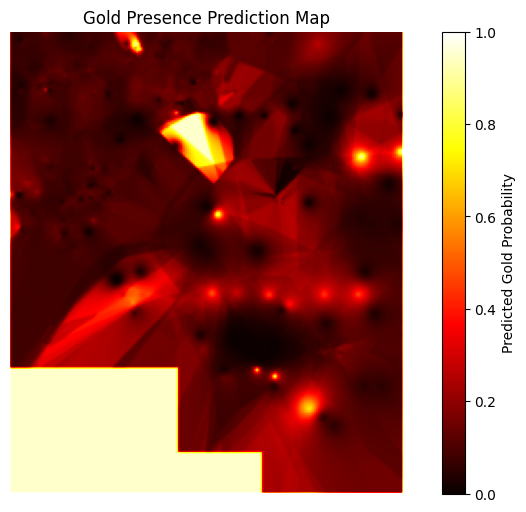

In [21]:
plt.figure(figsize=(10, 6))
plt.imshow(predictions, cmap="hot", interpolation="nearest")
plt.colorbar(label="Predicted Gold Probability")
plt.title("Gold Presence Prediction Map")
plt.axis("off")
plt.show()